### Codio Activity 16.1: Polynomial Features and Classification

**Expected Time = 30 minutes** 

**Total Points = 30**

This activity focuses on comparing versions of logistic regression classifier on a wine dataset from scikitlearn.  Your goal is to understand how the performance changes and the decision boundary is effected.  


#### Index

- [Problem 1](#-Problem-1)
- [Problem 2](#-Problem-2)
- [Problem 3](#-Problem-3)


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_wine
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import Pipeline

from sklearn import set_config

set_config(display="diagram")
import seaborn as sns

In [2]:
X, y = load_wine(return_X_y=True, as_frame=True)

In [3]:
X.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [4]:
X1 = X[["total_phenols", "color_intensity"]]

<Axes: xlabel='total_phenols', ylabel='color_intensity'>

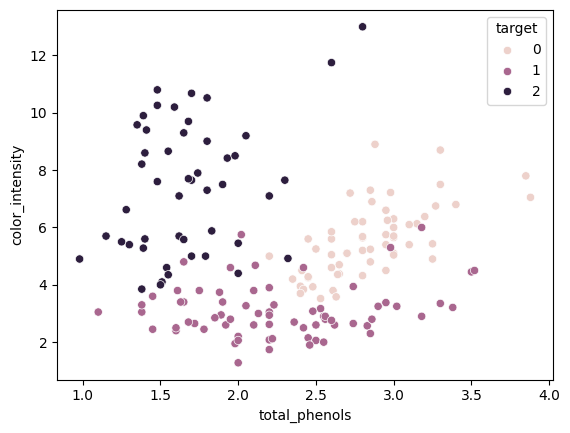

In [5]:
sns.scatterplot(data=X1, x="total_phenols", y="color_intensity", hue=y)

[Back to top](#-Index)

### Problem 1

#### Logistic Regression

**10 Points**

Below, fit a `LogisticRegression` estimator with `multi_class = 'multinomial'` on `X1` and `y`.  Uncomment the code to visualize the decision boundary of the resulting estimator assigned to `lgr` below.

In [6]:
### GRADED
lgr = LogisticRegression(multi_class="multinomial").fit(X1, y)

### ANSWER CHECK
lgr

LogisticRegression(multi_class='multinomial')

<Axes: xlabel='total_phenols', ylabel='color_intensity'>

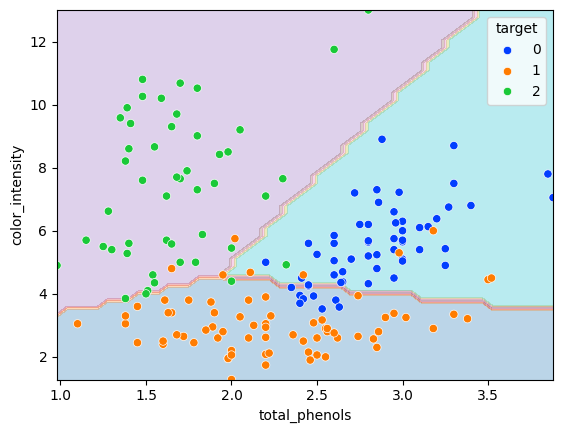

In [7]:
import warnings

warnings.filterwarnings("ignore")

## Uncomment to visualize the decision boundary for lgr
xx = np.linspace(X1.iloc[:, 0].min(), X1.iloc[:, 0].max(), 50)
yy = np.linspace(X1.iloc[:, 1].min(), X1.iloc[:, 1].max(), 50)
XX, YY = np.meshgrid(xx, yy)
grid = np.c_[XX.ravel(), YY.ravel()]
labels = pd.factorize(lgr.predict(grid))[0]

plt.contourf(xx, yy, labels.reshape(XX.shape), cmap="tab10", alpha=0.3)
sns.scatterplot(
    data=X1, x="total_phenols", y="color_intensity", hue=y, palette="bright"
)

[Back to top](#-Index)

### Problem 2

#### Logistic Regression with Quadratic Features

**10 Points**

Below, create and fit a `Pipeline` named `quad_pipe` with steps: 

- `poly`: Create quadratic features with `PolynomialFeatures` with no bias and degree of 2
- `scale`: `StandardScaler` applied to polynomial features
- `lgr`: `LogisticRegression` with `multi_class = 'multinomial'`

Visualize the decision boundary by uncommenting the code below.

In [8]:
### GRADED
quad_pipe = Pipeline(
    [
        ("poly", PolynomialFeatures(include_bias=False, degree=2)),
        ("scale", StandardScaler()),
        ("lgr", LogisticRegression(multi_class="multinomial")),
    ]
).fit(X1, y)

### ANSWER CHECK
quad_pipe

Pipeline(steps=[('poly', PolynomialFeatures(include_bias=False)),
                ('scale', StandardScaler()),
                ('lgr', LogisticRegression(multi_class='multinomial'))])

<Axes: xlabel='total_phenols', ylabel='color_intensity'>

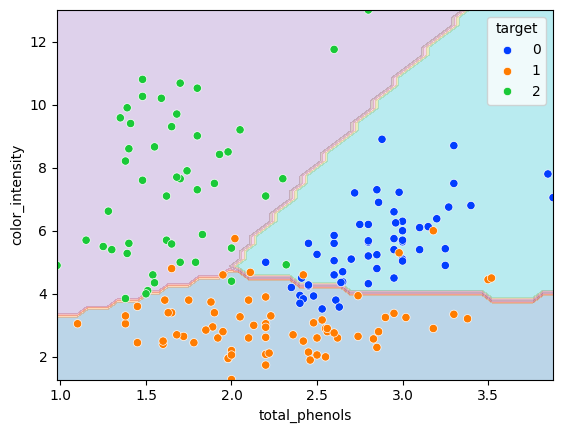

In [9]:
## Uncomment to visualize pipeline boundary
labels = pd.factorize(quad_pipe.predict(grid))[0]
plt.contourf(xx, yy, labels.reshape(XX.shape), cmap="tab10", alpha=0.3)
sns.scatterplot(
    data=X1, x="total_phenols", y="color_intensity", hue=y, palette="bright"
)

<Axes: xlabel='total_phenols', ylabel='color_intensity'>

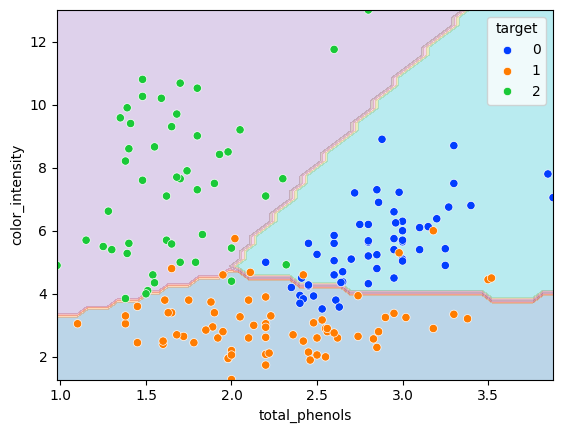

In [10]:
## Uncomment to visualize the decision boundary for quad_pipe
labels = pd.factorize(quad_pipe.predict(grid))[0]
plt.contourf(xx, yy, labels.reshape(XX.shape), cmap="tab10", alpha=0.3)
sns.scatterplot(
    data=X1, x="total_phenols", y="color_intensity", hue=y, palette="bright"
)

[Back to top](#-Index)

### Problem 3

#### Logistic Regression with Degree 5 features

**10 Points**

Finally, create a pipeline named `quintic_pipe` with polynomial features of degree 5 and visualize the decision boundary. Use the same named steps as above. 

In [11]:
### GRADED
quintic_pipe = Pipeline(
    [
        ("poly", PolynomialFeatures(include_bias=False, degree=5)),
        ("scale", StandardScaler()),
        ("lgr", LogisticRegression(multi_class="multinomial")),
    ]
).fit(X1, y)

### ANSWER CHECK
quintic_pipe

Pipeline(steps=[('poly', PolynomialFeatures(degree=5, include_bias=False)),
                ('scale', StandardScaler()),
                ('lgr', LogisticRegression(multi_class='multinomial'))])

<Axes: xlabel='total_phenols', ylabel='color_intensity'>

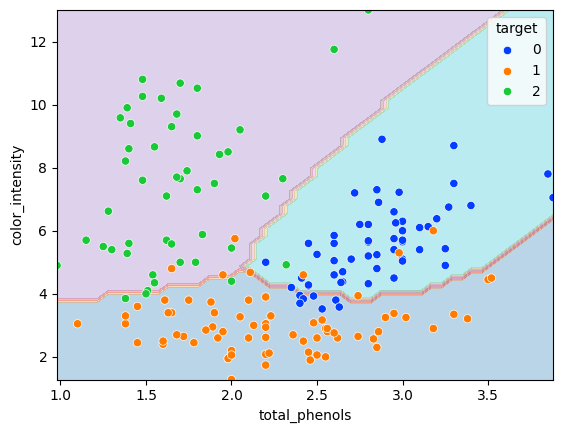

In [12]:
## Uncomment to visualize the decision boundary for quintic_pipe
labels = pd.factorize(quintic_pipe.predict(grid))[0]
plt.contourf(xx, yy, labels.reshape(XX.shape), cmap="tab10", alpha=0.3)
sns.scatterplot(
    data=X1, x="total_phenols", y="color_intensity", hue=y, palette="bright"
)